In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import lifelines
from myfunctions import PlottingLL  
from myfunctions import CoxRegressionModel
from myfunctions import SevenPlot


stime = np.load('stime_eb25_ap25_Mu0.50_Np30_logsp1.npy')
Ne, Na, Nm, Np = 25,25,1,30

#binary semi-major axis
ab = 1

#binary eccentricity
ebs = np.linspace(0.,0.7,Ne)
#print(ebs)

    
#test particle semi- major axis 
aps = ab*np.linspace(1.,5.,Na)


# for x in range(0,25,6):
#     print(ebs[x])
    
for y in range(0,19,3):
    print(aps[y])
    
    

1.0
1.5
2.0
2.5
3.0
3.5
4.0


570
                T  E  aps
0      102.400265  1  1.0
1       62.831853  1  1.0
2       62.831853  1  1.0
3       62.831853  1  1.0
4       62.831853  1  1.0
..            ... ..  ...
565  62831.853072  0  4.0
566  62831.853072  0  4.0
567  62831.853072  0  4.0
568  62831.853072  0  4.0
569  62831.853072  0  4.0

[570 rows x 3 columns]


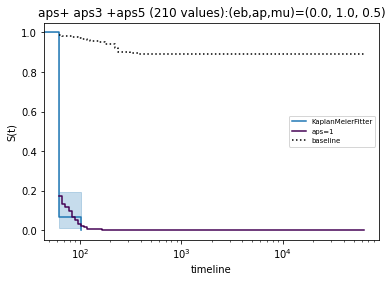

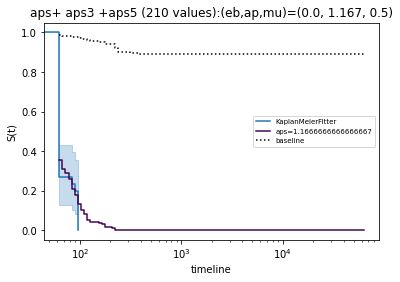

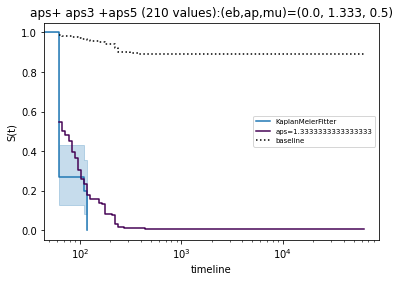

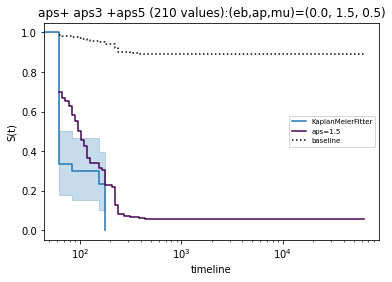

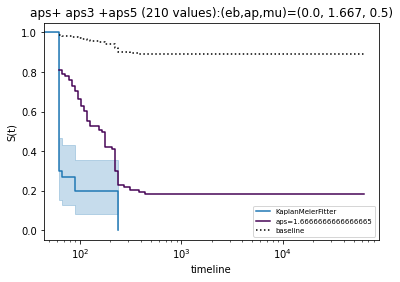

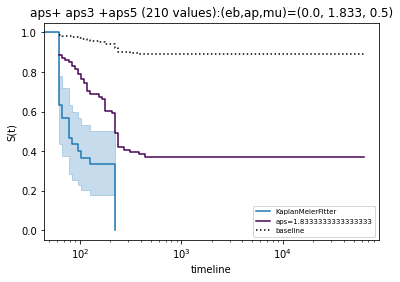

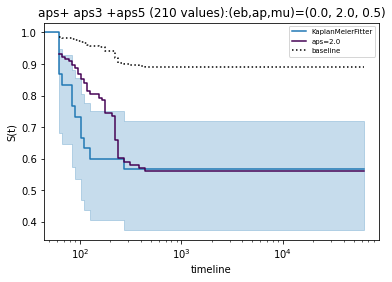

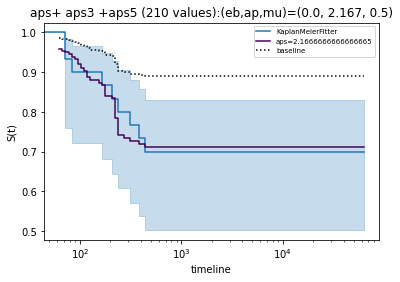

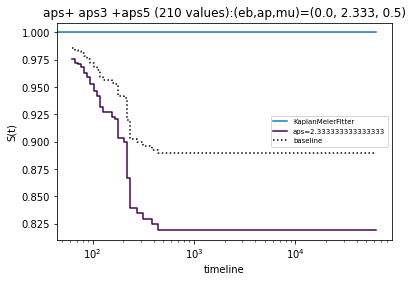

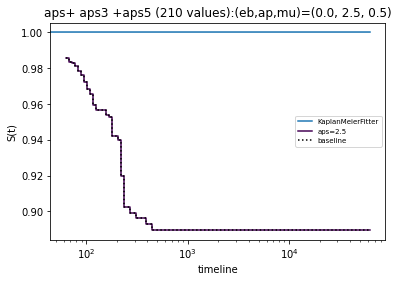

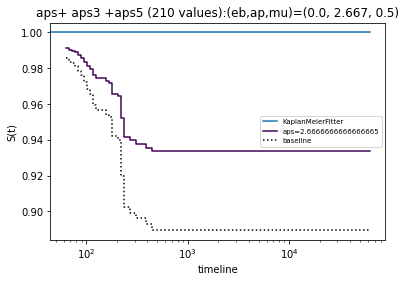

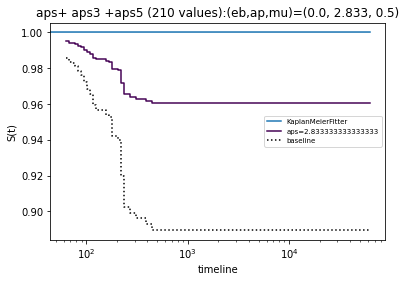

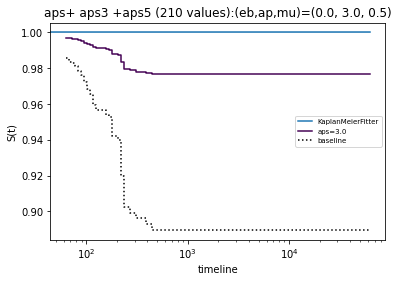

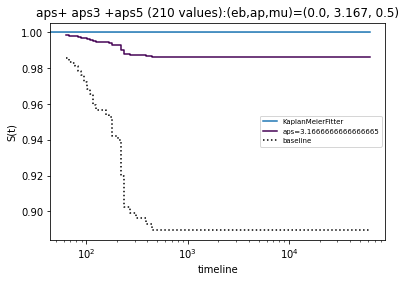

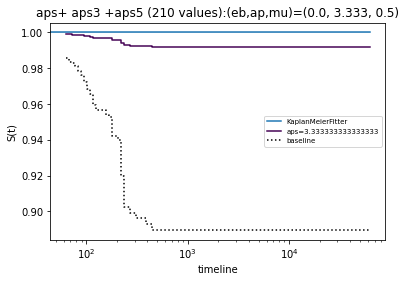

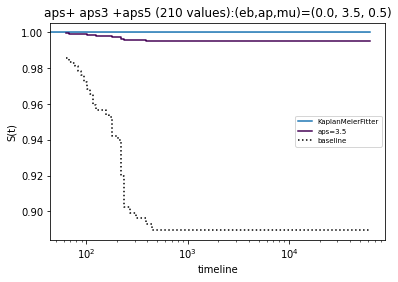

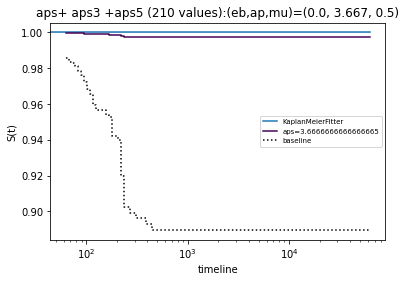

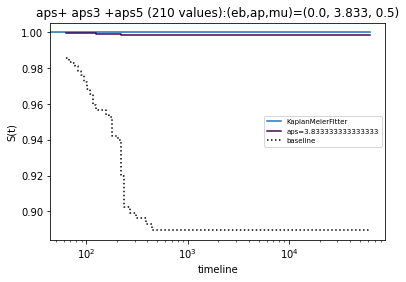

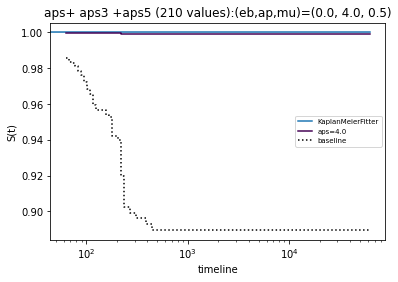

In [2]:
#Binary reduced mass
mu = 0.500

#for 5 values of eb and 7 values of ap with 30 survival times each = we have a total of 1050 values

#for the entire length of eb (25) and ap (25) values with 30 survival times each = we have a total of 18 750 values 
ap_s = []
ap_s2 = []
ap_s3 = []
ap_s5 = []
stimes = []
eap_ = []
ebb_ = []

# aps2 = []
# aps3 = []
# aps5 = []
# eap_0 = []


for y in range(0,19,1):
    stimes.append(stime[0,y,:])
    n = 30
    
    app = [aps[y]]*n
    ap_s.append(app)
    
#*******************************************************************************************************#
# for x in range(0,25,1):
#     for y in range(0,25,1):

#         stimes.append(stime[x,y,:])
#         n = 30

#         app = [aps[y]]*n
#         ap_s.append(app)

#         #app2 = [aps[y]**2]*n
#         #ap_s2.append(app2)
#         #aps2.append([aps[y]**2])

#         #app3 = [aps[y]**3]*n
#         #ap_s3.append(app3)
#         #aps3.append([aps[y]**3])

#         #app5 = [aps[y]**5]*n
#         #ap_s5.append(app5)
#         #aps5.append([aps[y]**5])

#         #eap = [np.exp([aps[y]])]*n
#         #eap_.append(eap)
#         #eap_0.append(np.exp([aps[y]]))
        
#     N = 750
#     ebb = [ebs[x]]*N
#     ebb_.append(ebb)

#         #PlottingLL.PlottingLL(np.abs(ebs[0]),aps[x],mu,stime[0,x,:],Np)
#         #print(aps[x],stime[0,x,:])

#*********************************************************************************************************#
    


#1050 values   
stimes = list(np.concatenate(stimes).flat)
print(len(stimes))
ap_s = list(np.concatenate(ap_s).flat)
#print(stimes)
#print((ap_s))
#print(ap_s)
#ap_s2 = list(np.concatenate(ap_s2).flat)
#print(ap_s2)
#ap_s3 = list(np.concatenate(ap_s3).flat)
#print(ap_s3)
#ap_s5 = list(np.concatenate(ap_s5).flat)
#print(ap_s5)
#eap_ = list(np.concatenate(eap_).flat)
#print(eap_)

#*********************************************************************************************#
# ebb_ = list(np.concatenate(ebb_).flat)
# print(len(ebb_))
#*********************************************************************************************#

# aps2 = list(np.concatenate(aps2).flat)
# aps3 = list(np.concatenate(aps3).flat)
# aps5 = list(np.concatenate(aps5).flat)
# eap_0 = list(np.concatenate(eap_0).flat)


N = 570
#N = 18750


#for x in range(0,25,6):
#   for y in range(3,10,1):


#******************************************************************************************************#
# for x in range(0,25,18):
#     for y in range(3,10,3):
#         CoxRegressionModel.CoxRegressionModel(stimes,N,ap_s, ap_s2, ap_s3,ap_s5,ebb_,eap_,np.abs(ebs[x]),aps[y],mu,stime[x,y,:],Np)
       
#******************************************************************************************************#

for y in range(0,19,1):
    df = CoxRegressionModel.CoxRegressionModel(stimes,N,ap_s,np.abs(ebs[0]),aps[y],mu,stime[0,y,:],Np)

    

print(df)
    
    
#CoxRegressionModel.CoxRegressionModel(stimes,N,ap_s,np.abs(ebs),aps,mu,stime,Np)
#CoxRegressionModel.CoxRegressionModel(stimes,N,ap_s)
#SevenPlot.SevenPlot(stime,Np,aps)


In [4]:
from autograd.scipy.special import expit
from lifelines.fitters import ParametricRegressionFitter


class CureModel(ParametricRegressionFitter):
    _scipy_fit_method = "SLSQP"
    _scipy_fit_options = {"ftol": 1e-10, "maxiter": 200}

    _fitted_parameter_names = ["lambda_", "beta_", "rho_"]

    def _cumulative_hazard(self, params, T, Xs):
        c = expit(np.dot(Xs["beta_"], params["beta_"]))

        lambda_ = np.exp(np.dot(Xs["lambda_"], params["lambda_"]))
        rho_ = np.exp(np.dot(Xs["rho_"], params["rho_"]))
        sf = np.exp(-(T / lambda_) ** rho_)

        return -np.log((1 - c) + c * sf)


cm = CureModel(penalizer=0.0)


covariates = {"lambda_": df.columns.difference(['T', 'E']), "rho_": "1", "beta_": 'aps'}

cm.fit(df, "T", event_col="E", regressors=covariates, timeline=np.arange(10000))
cm.print_summary(2)



#***************************************************#
cm.predict_survival_function(rossi.loc[::100]).plot(figsize=(12,6))
#***************************************************#
# what's the effect on the survival curve if I vary "age"
fig, ax = plt.subplots(figsize=(12, 6))

cm.plot_covariate_groups(['age'], values=np.arange(20, 50, 5), cmap='coolwarm', ax=ax)



TypeError: ufunc 'expit' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# import math
# i,j=0,0
# PLOTS_PER_ROW = 5
# fig, axs = plt.subplots(math.ceil(len(df.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 60))
# for col in df.columns:
#     axs[i][j].scatter(df['target_col'], df[col], s=3)
#     axs[i][j].set_ylabel(col)
#     j+=1
#     if j%PLOTS_PER_ROW==0:
#         i+=1
#         j=0
# plt.show()